In [15]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [16]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs


In [17]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [18]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

64.98014411468256 102.7492134511532
-34.84259057031843 67.73991546218366
36.041413634236605 163.82171347898077
53.192026818324535 -46.166617221297486
-42.11106012888381 38.5743584251137
14.683495747609825 96.60018249533988
-8.73422397116282 138.37622183640372
-64.07049689566884 -146.7026106028814
-19.910988090639307 39.013663953461474
-85.17165918392494 -66.99534677316275
64.13123829567488 103.77383450832167
32.23934450247836 -156.114384488941
62.75004823010957 -108.50259457747971
-80.97297739574913 148.07350541831966
-49.835039595368045 -80.35051691764355
-27.565127606556672 -142.08468199658077
-72.92300401612565 -101.25248425188704
26.592345229808927 111.1635702084958
-82.34263299503114 15.100801049452656
57.01268239728026 159.14142245222126
64.10876051152539 2.899954749676965
-81.92718150860821 -36.55234106723114
-4.624735783218171 73.26548681323285
20.947557493304714 154.19044712779743
-1.6028671905116028 0.2490859271245256
48.50370678612771 157.03534516498405
-65.56736773442866 -6

21.810306583242593 85.14901420454083
42.93176883014385 -91.10730334414315
79.92471043732033 -24.088681028549928
86.70645799834952 101.3465341766281
6.085939230447906 -60.01338009033803
-16.599541888069083 -178.64933972612022
15.566489183558744 -28.82911626565499
1.8931533883580443 64.63732956895447
-15.855931948704622 51.21099678412392
-67.4303027107691 -26.030163524763594
12.838489588320357 -74.92148780963082
49.18108723098658 -99.81923356668513
-84.86562068473596 -48.89835757453315
54.072429202104075 156.46899853112149
0.037577757109076515 -153.67922134284427
58.845520529967274 -11.644191291075998
-2.067768960674769 -43.1771270913554
-87.69254869111101 -84.29288572795336
-67.55425442694232 -116.92099098497346
-85.31230383308637 -85.38407190047991
51.520955776995265 107.13397139373444
17.300567570616252 178.25466618694355
45.82145830952933 -120.10169193243806
62.5544320051612 131.0601835807002
-60.87217587956671 14.499331155419554
-77.58957527362357 40.669206355973046
-15.167831967844

-59.478442272699866 52.79881442639629
36.30498813643432 2.2425220155746786
49.59981012979463 -70.92069774346675
-64.64436599663921 160.10461070154338
10.839471895090156 -92.00232209171195
-1.5292974963444692 41.95658267975341
53.75618543515387 -151.34182972752467
70.8178562816667 108.32663412682678
-26.484197933067016 -134.6848995523288
-41.83802000666947 173.1474821630942
-78.49399070406336 2.7555793255249625
-22.191206466796956 -17.247909928263482
16.034273045184648 -104.49619492823604
-51.98990987766851 -27.488309655119565
-80.73751792859146 164.8638490598534
51.351050739842464 170.2084479683541
85.15475059139175 100.51807567485417
-17.73502532966249 -145.3726206319501
12.990991990725988 159.0489346898027
-17.373640920794898 126.50678814212858
49.47168005358526 34.906956388449856
-54.34599736338998 138.10190935752775
42.66650031146452 58.9918940244668
49.810305290534586 74.36239248618543
59.64975771980201 161.46246425672223
25.413340227270837 111.39691672491529
-22.445239889933532 -

In [19]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [20]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

610

In [24]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [38]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key


In [26]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [27]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | tura
Processing Record 2 of Set 1 | mahebourg
Processing Record 3 of Set 1 | severo-kurilsk
Processing Record 4 of Set 1 | nanortalik
Processing Record 5 of Set 1 | umzimvubu
City not found. Skipping...
Processing Record 6 of Set 1 | ye
City not found. Skipping...
Processing Record 7 of Set 1 | merauke
Processing Record 8 of Set 1 | mataura
Processing Record 9 of Set 1 | quelimane
Processing Record 10 of Set 1 | ushuaia
Processing Record 11 of Set 1 | kapaa
Processing Record 12 of Set 1 | yellowknife
Processing Record 13 of Set 1 | hobart
Processing Record 14 of Set 1 | coihaique
Processing Record 15 of Set 1 | rikitea
Processing Record 16 of Set 1 | punta arenas
Processing Record 17 of Set 1 | shaoyang
Processing Record 18 of Set 1 | bredasdorp
Processing Record 19 of Set 1 | tigil
Processing Record 20 of Set 1 | raudeberg
Processing Record 21 of Set 1 | hithadhoo
Processing Record 22 of Set 1 |

Processing Record 37 of Set 4 | klaksvik
Processing Record 38 of Set 4 | bethel
Processing Record 39 of Set 4 | zaritap
Processing Record 40 of Set 4 | tutoia
Processing Record 41 of Set 4 | barra patuca
Processing Record 42 of Set 4 | iqaluit
Processing Record 43 of Set 4 | bongandanga
Processing Record 44 of Set 4 | peniche
Processing Record 45 of Set 4 | mudyuga
City not found. Skipping...
Processing Record 46 of Set 4 | rocha
Processing Record 47 of Set 4 | lata
Processing Record 48 of Set 4 | fortuna
Processing Record 49 of Set 4 | palabuhanratu
City not found. Skipping...
Processing Record 50 of Set 4 | atambua
Processing Record 1 of Set 5 | flagstaff
Processing Record 2 of Set 5 | kimberley
Processing Record 3 of Set 5 | yelizovo
Processing Record 4 of Set 5 | airai
Processing Record 5 of Set 5 | beringovskiy
Processing Record 6 of Set 5 | azanka
Processing Record 7 of Set 5 | nathdwara
Processing Record 8 of Set 5 | chapais
Processing Record 9 of Set 5 | pevek
Processing Record

Processing Record 27 of Set 8 | dejen
Processing Record 28 of Set 8 | san-pedro
Processing Record 29 of Set 8 | isangel
Processing Record 30 of Set 8 | kamenskoye
City not found. Skipping...
Processing Record 31 of Set 8 | kungurtug
Processing Record 32 of Set 8 | gangotri
City not found. Skipping...
Processing Record 33 of Set 8 | pangai
Processing Record 34 of Set 8 | hay river
Processing Record 35 of Set 8 | tazovskiy
Processing Record 36 of Set 8 | agirish
Processing Record 37 of Set 8 | atar
Processing Record 38 of Set 8 | bouca
Processing Record 39 of Set 8 | naze
Processing Record 40 of Set 8 | mae hong son
Processing Record 41 of Set 8 | ust-ishim
Processing Record 42 of Set 8 | junin
Processing Record 43 of Set 8 | kalat
Processing Record 44 of Set 8 | saquarema
Processing Record 45 of Set 8 | diamantino
Processing Record 46 of Set 8 | saravan
Processing Record 47 of Set 8 | sidi bu zayd
City not found. Skipping...
Processing Record 48 of Set 8 | kang
Processing Record 49 of S

Processing Record 18 of Set 12 | pangody
Processing Record 19 of Set 12 | karasuk
Processing Record 20 of Set 12 | port-cartier
Processing Record 21 of Set 12 | qui nhon
Processing Record 22 of Set 12 | formoso do araguaia
City not found. Skipping...
Processing Record 23 of Set 12 | andes
Processing Record 24 of Set 12 | salinopolis
Processing Record 25 of Set 12 | manacapuru
Processing Record 26 of Set 12 | bancal
Processing Record 27 of Set 12 | kawalu
Processing Record 28 of Set 12 | pasinler
Processing Record 29 of Set 12 | solnechnyy
Processing Record 30 of Set 12 | kepno
Processing Record 31 of Set 12 | azuaga
Processing Record 32 of Set 12 | cuiluan
Processing Record 33 of Set 12 | nyurba
Processing Record 34 of Set 12 | shimoda
Processing Record 35 of Set 12 | areosa
Processing Record 36 of Set 12 | balikpapan
Processing Record 37 of Set 12 | vestmanna
Processing Record 38 of Set 12 | mahendragarh
Processing Record 39 of Set 12 | shu
Processing Record 40 of Set 12 | medea
Proce

In [28]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Tura,25.5198,90.2201,76.19,84,96,3.02,IN,2021-09-26 21:47:22
1,Mahebourg,-20.4081,57.7000,70.09,94,75,17.27,MU,2021-09-26 21:47:23
2,Severo-Kurilsk,50.6789,156.1250,50.92,86,82,11.27,RU,2021-09-26 21:47:24
3,Nanortalik,60.1432,-45.2371,37.35,79,6,0.60,GL,2021-09-26 21:47:26
4,Merauke,-8.4667,140.3333,77.85,87,98,10.89,ID,2021-09-26 21:47:28
5,Mataura,-46.1927,168.8643,45.48,52,5,2.33,NZ,2021-09-26 21:47:28
6,Quelimane,-17.8786,36.8883,73.35,94,0,5.01,MZ,2021-09-26 21:47:29
7,Ushuaia,-54.8000,-68.3000,46.06,46,40,4.61,AR,2021-09-26 21:46:03
8,Kapaa,22.0752,-159.3190,84.18,75,75,3.00,US,2021-09-26 21:47:30
9,Yellowknife,62.4560,-114.3525,46.42,73,75,3.00,CA,2021-09-26 21:47:32


In [34]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

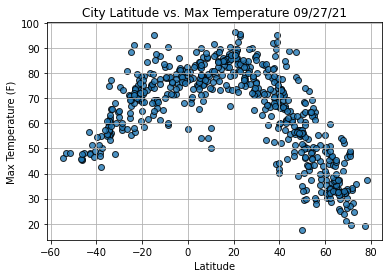

In [35]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

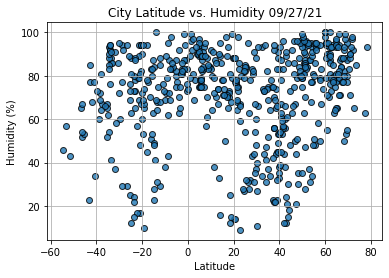

In [36]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

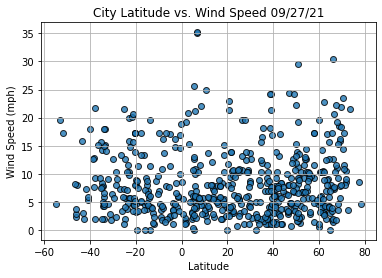

In [37]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()